In [8]:
from pathlib import Path
from cloudpathlib import S3Path, S3Client
import nibabel as nib 
import neuropythy as ny
from nilearn import datasets, input_data, connectome
import numpy as np
from dipy.tracking import utils
from dipy.io.streamline import load_tractogram

In [5]:
subj1_dwi = nib.load('shared/HCP/115825/T1w/Diffusion/data.nii.gz')


In [6]:
affine_mat = subj1_dwi.affine

In [11]:
labels = nib.load('shared/HCP/115825/MNINonLinear/aparc+aseg.nii.gz') ## use voxel-space instead
new_labels, lookup = utils.reduce_labels(labels.get_fdata())
tracts = load_tractogram(fr'shared/HCP/115825/sub-115825_dwi_space-RASMM_model-CSD_desc-prob_tractography.trk', subj1_dwi, bbox_valid_check=False)
tracts.remove_invalid_streamlines()
tracts = tracts.streamlines
m, grouping = utils.connectivity_matrix(tracts, subj1_dwi.affine, new_labels, return_mapping=True,
                                            mapping_as_streamlines=True)
    


In [13]:
m.shape

(114, 114)

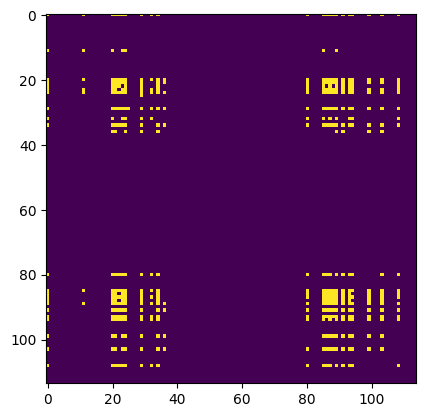

In [15]:
import matplotlib.pyplot as plt

plt.imshow(m >0)